# Exploritory Data Analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


# For time stamps
from datetime import datetime

In [2]:
df = pd.read_csv('./data/all_stocks_5yr.csv')

In [3]:
# Code for generating top n companies by volume
def get_top_n_by_vol(df, n):
    all_companies = df['Name'].unique()
    volume_df = {}
    for company in all_companies:
        volume_df[company] = df[df['Name']==company]['volume'].sum()

    volume_df = {k: v for k, v in sorted(volume_df.items(), key=lambda item: item[1],reverse=True)}
    return list(volume_df.keys())[:n]

# all_companies = get_top_n_by_vol(df,10)

In [ ]:
s = {True:"Makes sense", False:"Get a new name idiot"} [len(all_companies) == 500]
print(f"There are {len(all_companies)} companies in the S&P500 ... {s}")

In [4]:
top_10_companies_names = ['BAC', 'AAPL', 'GE', 'F', 'FB', 'MSFT', 'AMD', 'MU', 'INTC', 'CSCO']
BAC = df[df['Name']=='BAC'].reset_index(drop=True)
AAPL = df[df['Name']=='AAPL'].reset_index(drop=True)
GE = df[df['Name']=='GE'].reset_index(drop=True)
F = df[df['Name']=='F'].reset_index(drop=True)
FB = df[df['Name']=='FB'].reset_index(drop=True)
MSFT = df[df['Name']=='MSFT'].reset_index(drop=True)
AMD = df[df['Name']=='AMD'].reset_index(drop=True)
MU = df[df['Name']=='MU'].reset_index(drop=True)
INTC = df[df['Name']=='INTC'].reset_index(drop=True)
CSCO = df[df['Name']=='CSCO'].reset_index(drop=True)
top_10_companies = [BAC, AAPL, GE, F, FB, MSFT, AMD, MU, INTC, CSCO] 

## Overview of Closing Price

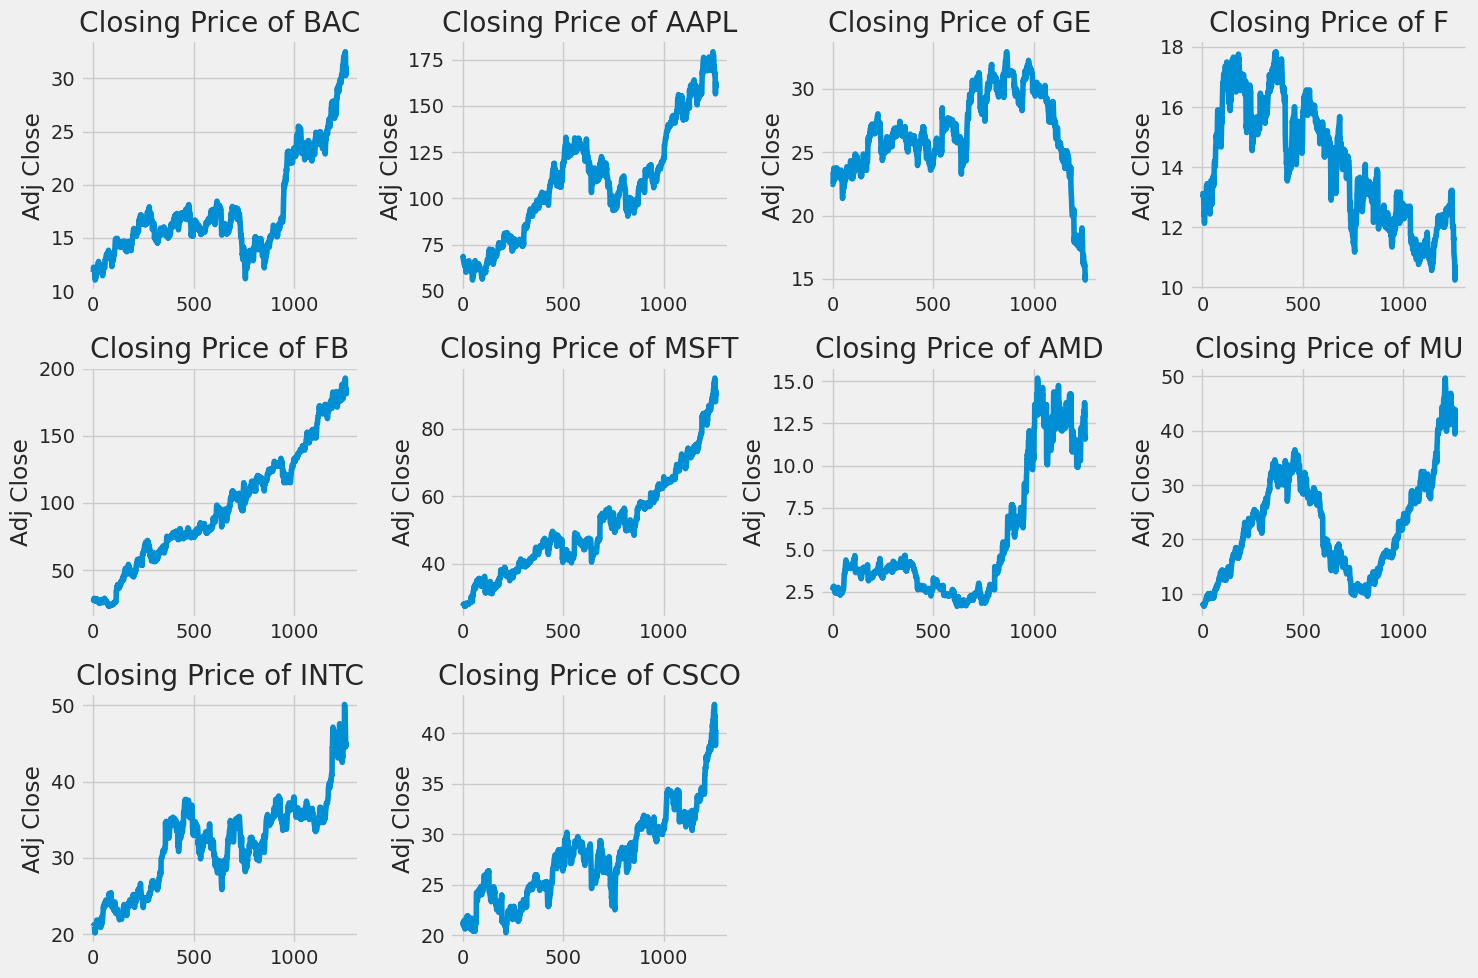

In [5]:
# Overview of historical closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(top_10_companies, 1):
    plt.subplot(3, 4, i)
    company['close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {top_10_companies_names[i - 1]}")
    
plt.tight_layout()



Clear postive trend in some cases some seasonality possible from the head and shoulders pattern of the plot, though is more distinctive in some cases.

## Fixed window moving average of closing price

In [6]:
ma_day = [10, 20, 50, 100, 200]
col_names = ['close']

for ma in ma_day:
    column_name = f"ma_close_{ma}_d"
    col_names.append(column_name)
    for company in top_10_companies:
        company[column_name] = company['close'].rolling(ma).mean()

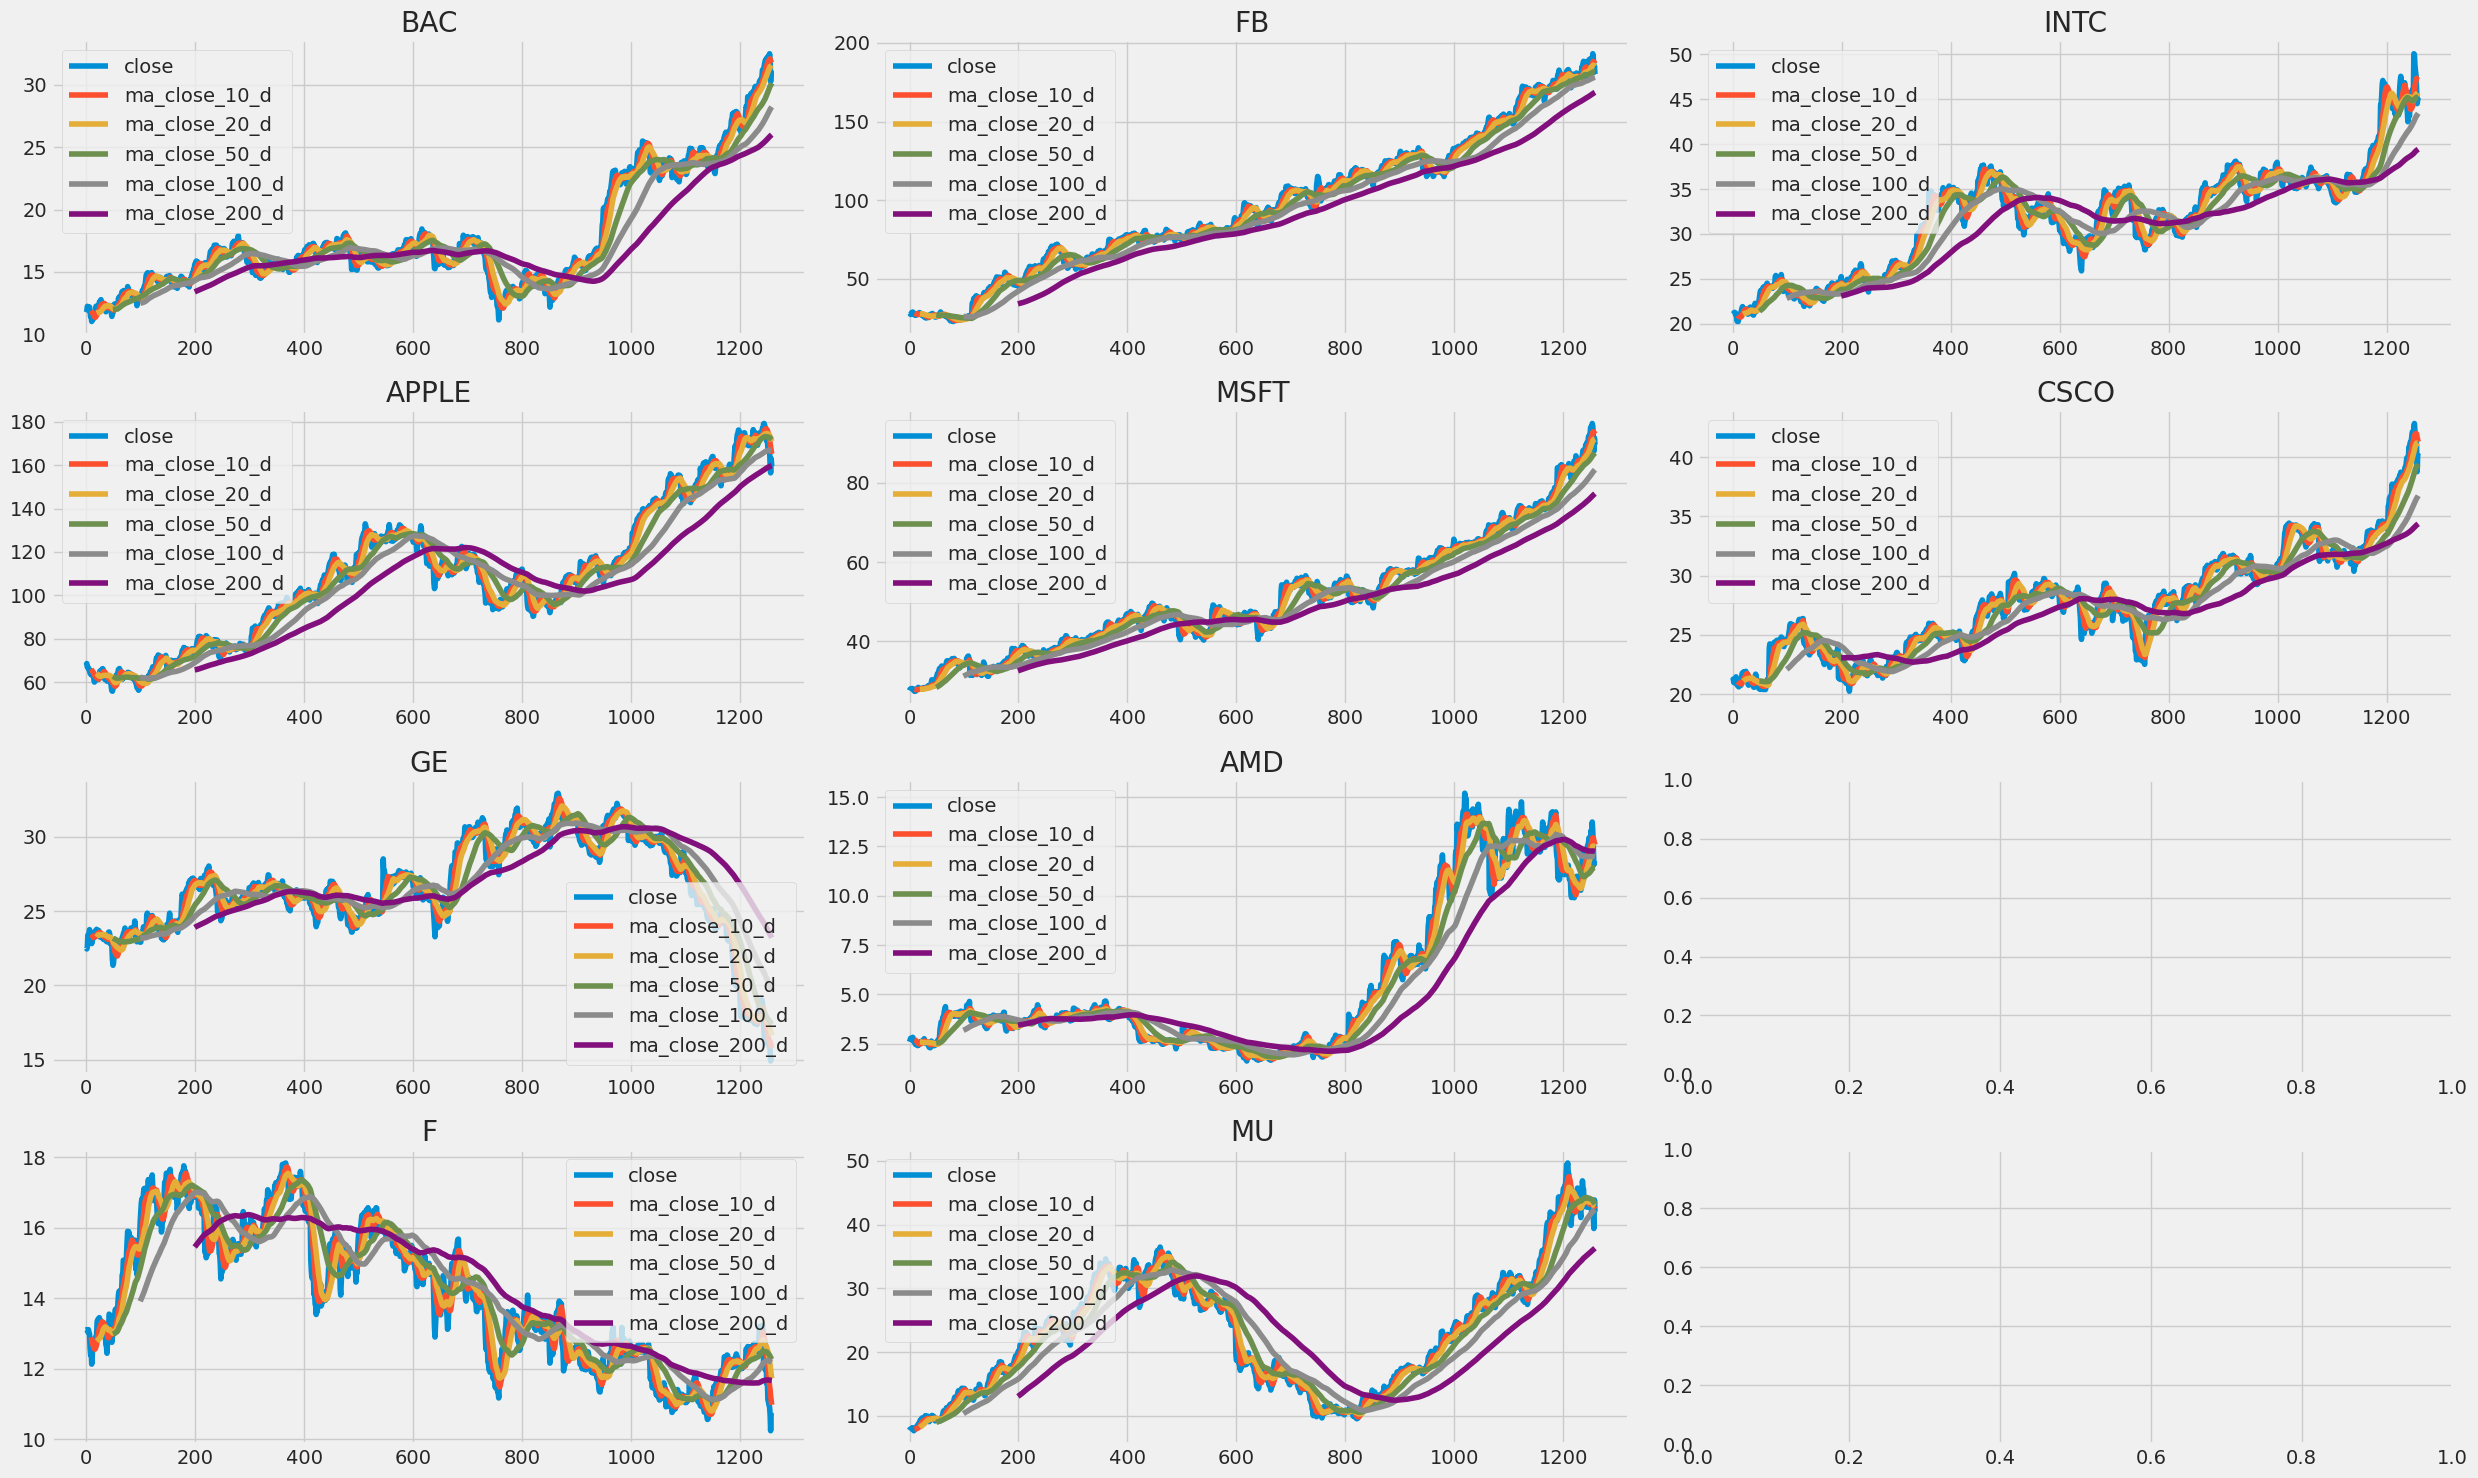

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=3)
fig.set_figheight(15)
fig.set_figwidth(25)

BAC[col_names].plot(ax=axes[0,0])
axes[0,0].set_title('BAC')

AAPL[col_names].plot(ax=axes[1,0])
axes[1,0].set_title('APPLE')

GE[col_names].plot(ax=axes[2,0])
axes[2,0].set_title('GE')

F[col_names].plot(ax=axes[3,0])
axes[3,0].set_title('F')

FB[col_names].plot(ax=axes[0,1])
axes[0,1].set_title('FB')

MSFT[col_names].plot(ax=axes[1,1])
axes[1,1].set_title('MSFT')

AMD[col_names].plot(ax=axes[2,1])
axes[2,1].set_title('AMD')

MU[col_names].plot(ax=axes[3,1])
axes[3,1].set_title('MU')

INTC[col_names].plot(ax=axes[0,2])
axes[0,2].set_title('INTC')

CSCO[col_names].plot(ax=axes[1,2])
axes[1,2].set_title('CSCO')

fig.tight_layout()

Trend becomes clearer as the seasonality appears to be removed as a larger sliding window is taken. Smoothing occers as window size increases

## Autocorrelation

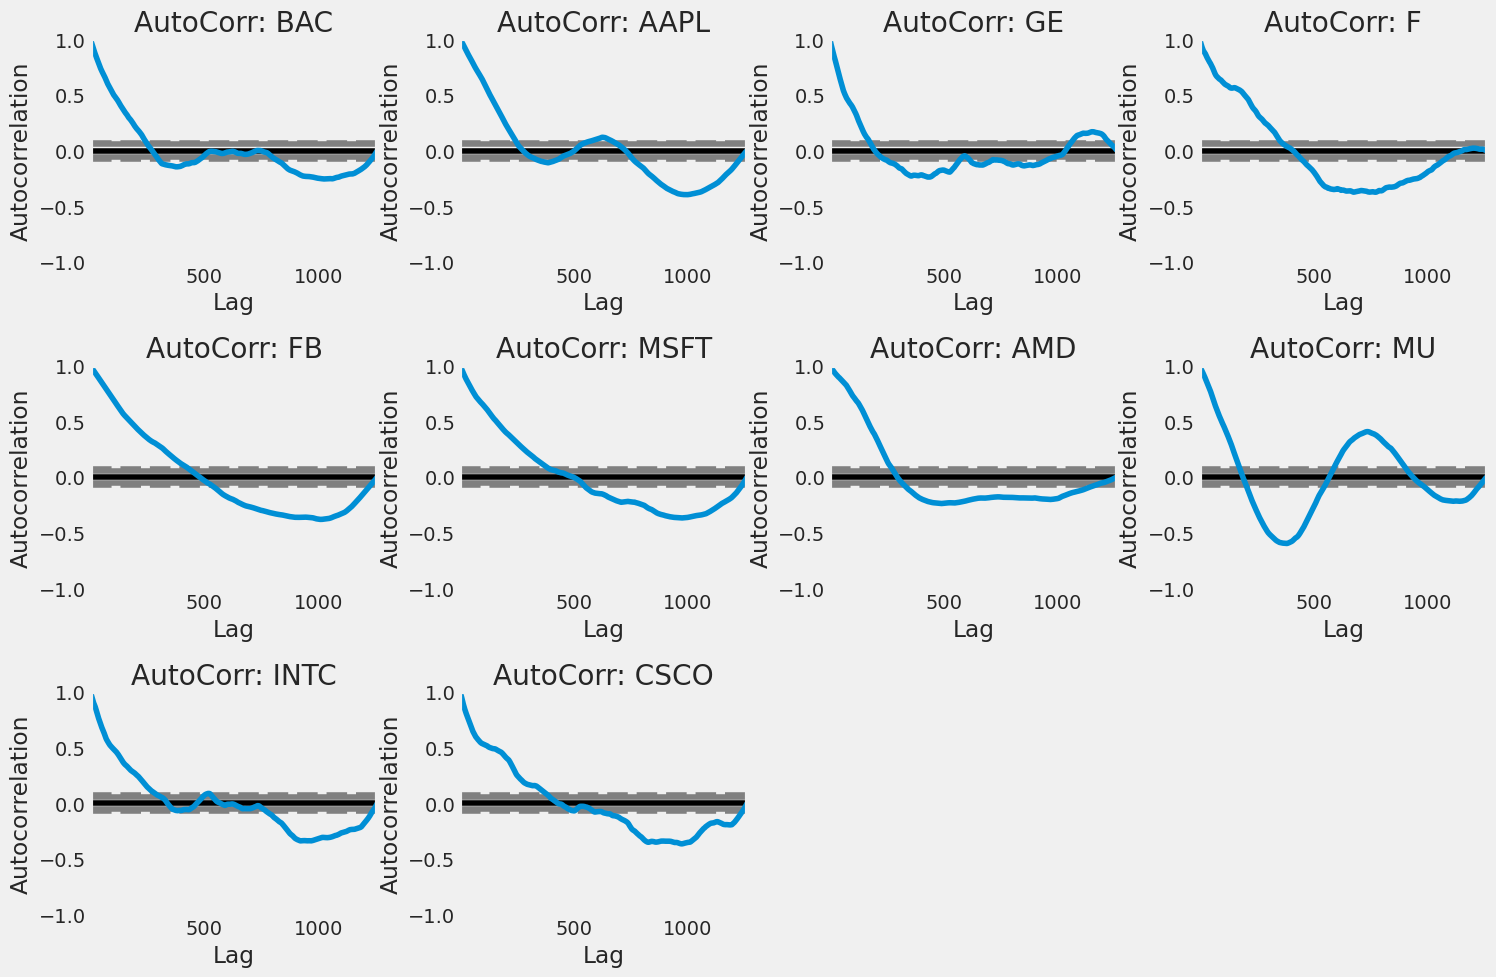

In [8]:
from pandas.plotting import autocorrelation_plot

# Overview of historical closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(top_10_companies, 1):
    plt.subplot(3, 4, i)

    pd.plotting.autocorrelation_plot(company['close'])
    plt.title(f"AutoCorr: {top_10_companies_names[i - 1]}")
    
plt.tight_layout()

## Seasonality

<Figure size 640x480 with 0 Axes>

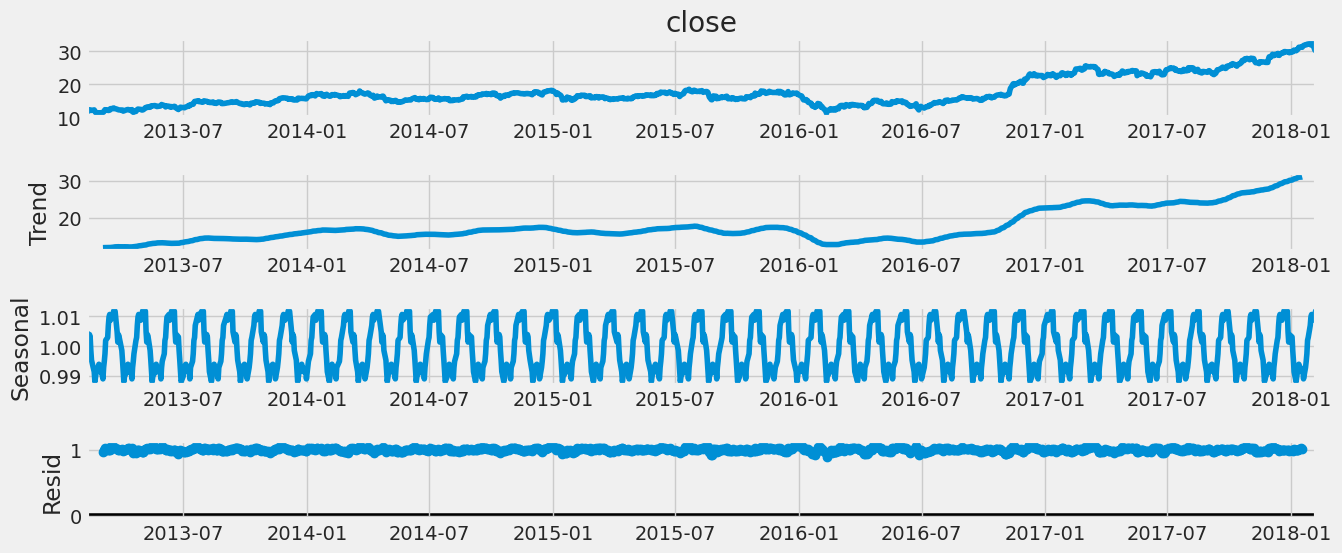

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

BAC.index = pd.to_datetime(BAC['date'])

res = seasonal_decompose(BAC['close'],model='multiplicative',period=30)
fig = plt.figure()
fig = res.plot()
fig.set_size_inches(16,6)
plt.show()

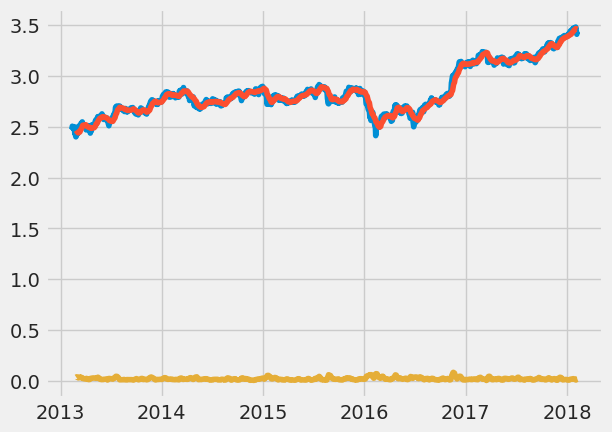

In [11]:
close_log = np.log(BAC['close'])
ma_dev = close_log.rolling(12).mean()
sd_dev = close_log.rolling(12).std()
plt.plot(close_log)
plt.plot(ma_dev)
plt.plot(sd_dev)

In [17]:
from statsmodels.tsa.stattools import adfuller
def test_adft(data):
    adft = adfuller(data,autolag='AIC')
    out = pd.Series(adft[:4],['Stats','p_value','no lags','no obs'])
    for key, val in adft[4].items():
        out[f'crit val at {key}%'] = val

    return out
test_adft(diff)

Stats              -9.401173e+00
p_value             6.181794e-16
no lags             6.000000e+00
no obs              1.241000e+03
crit val at 1%%    -3.435630e+00
crit val at 5%%    -2.863872e+00
crit val at 10%%   -2.568011e+00
dtype: float64